In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#shape of the data
df.shape

(150, 5)

# Insights:
Data has 150 observations and 5 features

In [5]:
#datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Insights:
1. All independent features are numerical in nature
2. Dependent feature is categorical in nature

In [6]:
#description of data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Insights:
1. Sepal length has highest mean and max values
2. Other features show variability in distribution

<Axes: >

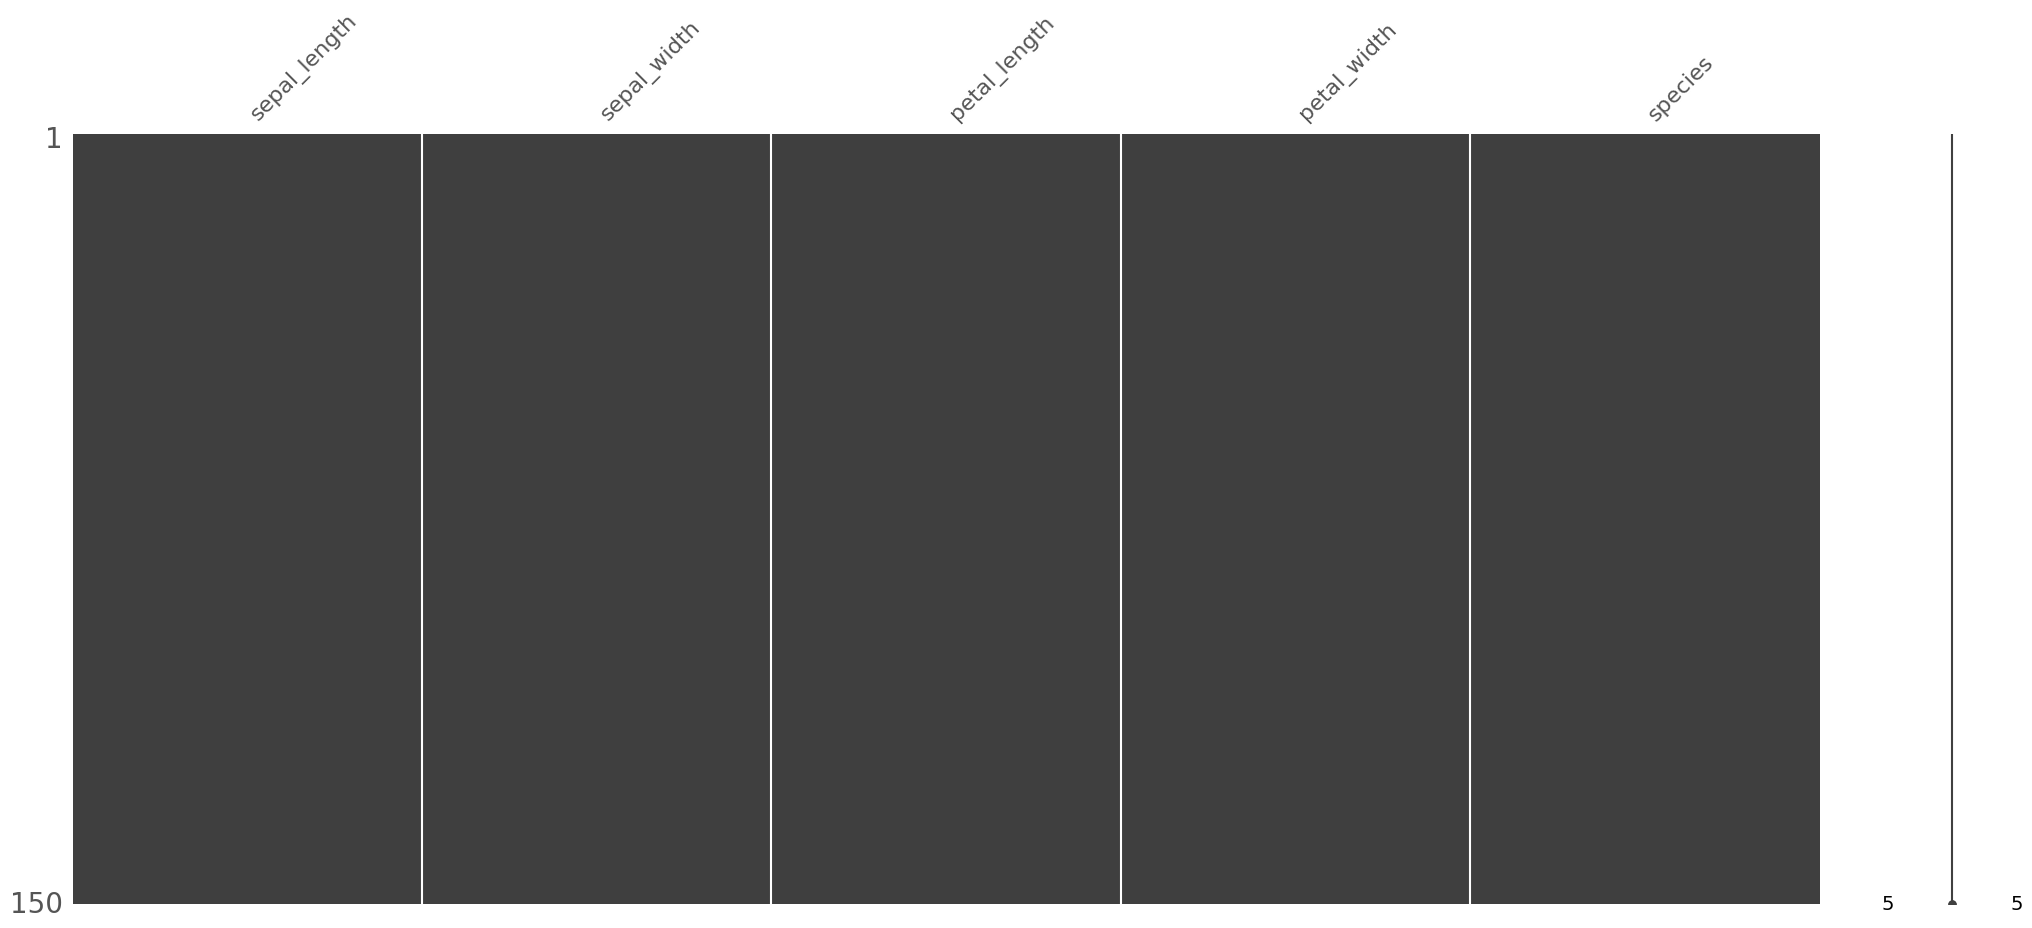

In [7]:
#missing value
import missingno as msno
msno.matrix(df)

# Insights:
1. No missing values

In [8]:
# unique elements in each column
for i in df.columns:
    print({i:df[i].unique()})

{'sepal_length': array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])}
{'sepal_width': array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])}
{'petal_length': array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])}
{'petal_width': array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])}
{'species': array(['setosa', 'versicolor', 'virginica'], dtype=object)}


# Insights:
1. No mistyped information
2. Target variable has 3 classes

# Univaraite analysis

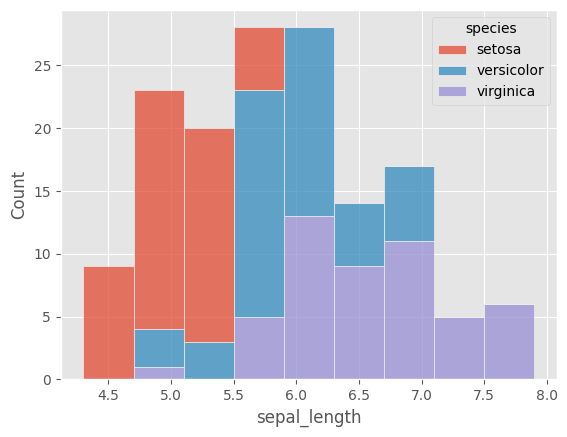

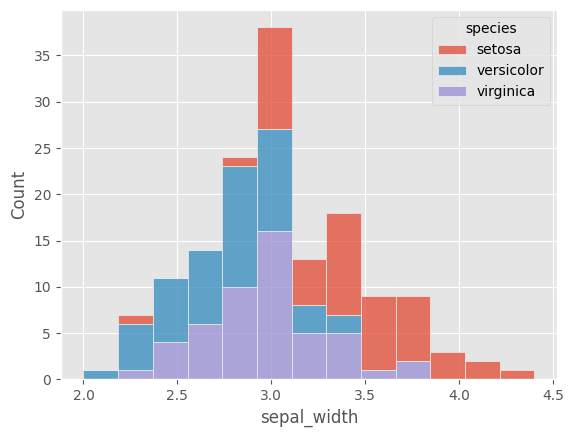

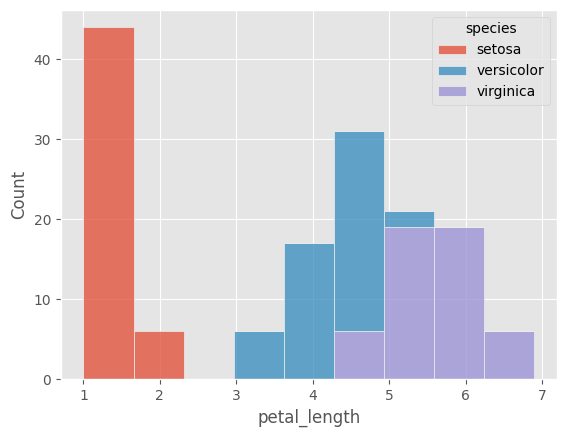

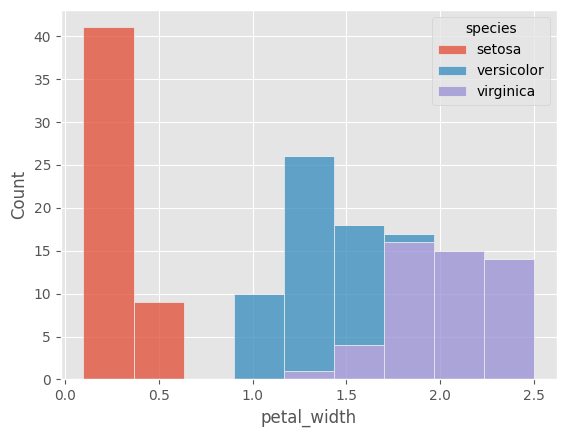

In [9]:
for i in df.columns[:-1]:   
    sns.histplot(df,x=i,hue='species',multiple='stack')
    plt.show()

# Insigths : 
1. In petal length and petal width the species Setosa appears to be clearly spearated
2. Other features show mixed species distribution

# Outliers

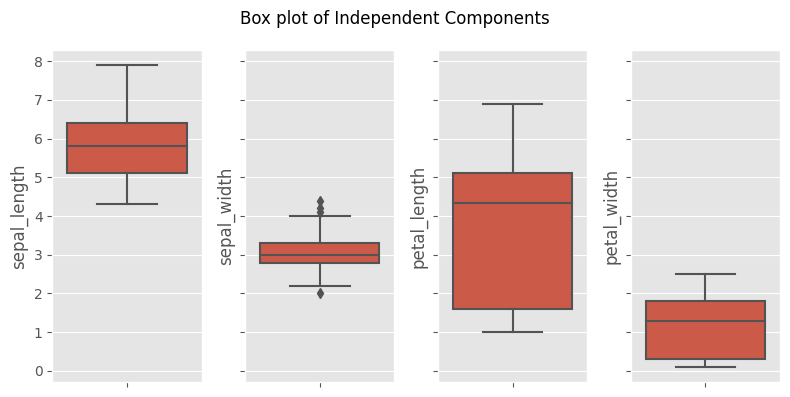

In [10]:
#Outlier detection
fig , ax = plt.subplots(figsize = (8,4), ncols = 4 , nrows = 1 , layout = 'tight',sharey= True)
fig.suptitle("Box plot of Independent Components")
axis = 0
for i in df.columns[:-1]:
    sns.boxplot(df,y=i ,ax=ax[axis])  
    axis+=1
plt.show()


# insights
1. Sepal width has upper bound and lower bound outliers
2. Petal width has lowest median (data requires scaling)

# Bivariate analysis

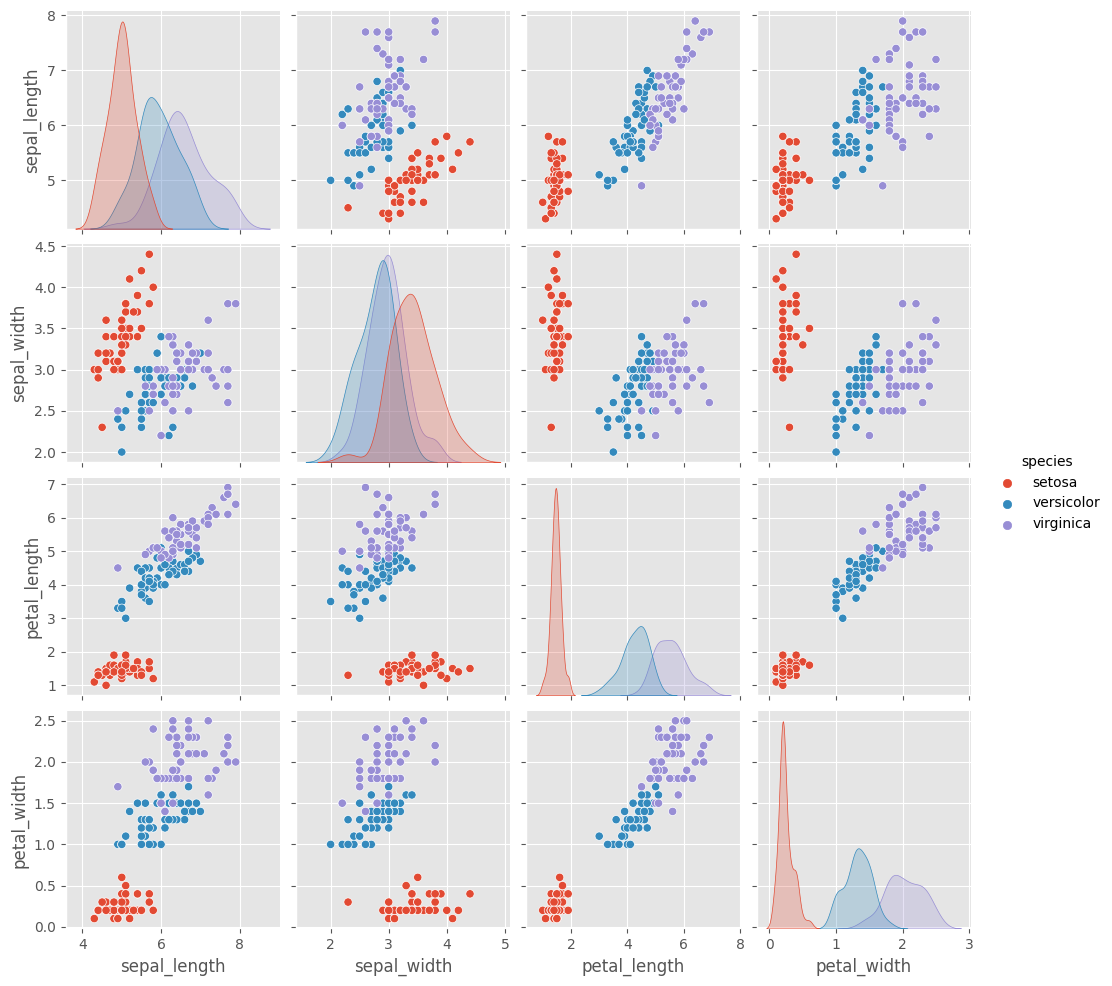

In [11]:
#bivariate
sns.pairplot(df,hue='species')

# Insights:
1. Setosa appears to be easily separable in all comparisons
2. Versicolor and Virginica show varying degree of overlap in all comparisons

Text(0.5, 1.0, 'Correlation matrix of IRIS data')

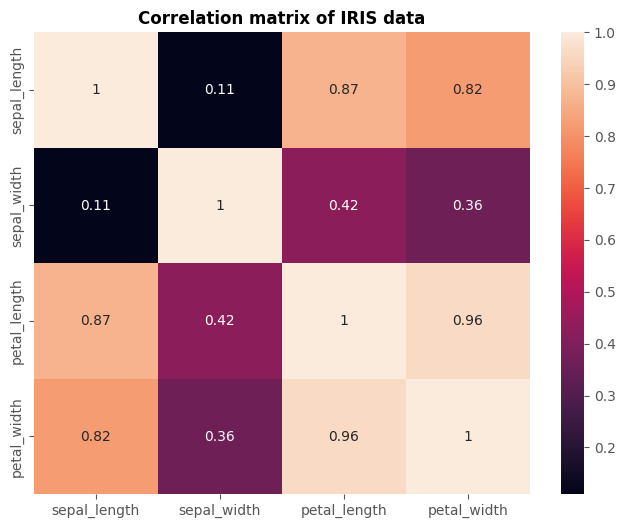

In [12]:
plt.figure(figsize = (8,6))
sns.heatmap(df.iloc[:,:-1].corr().abs().round(2),annot=True)
plt.title("Correlation matrix of IRIS data" , size = 12 , weight = 'bold')

# 

# Insights:
1. Sepal length shows high correlation (> 0.8) with petal length and petal width
2. Petal length shows high correlation (> 0.9) with petal width

# Model with SVC

In [13]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [14]:
# Encoding the dependent variable
df['species'] = df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

In [15]:
# Dependendent and independent features
X = df.drop('species',axis=1)
y = df['species']

In [16]:
#train test split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [17]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [19]:
y_pred = svc_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



# Visualizing the SVC model decision with a 2D example

In [20]:
from sklearn.datasets import make_classification

In [21]:
import numpy as np
from sklearn.svm import SVC
# Creating a random dataset of 2,000 samples and only 2 features
# (for 2–dimensional space). And yeah, it's a binary classification
# here (`y` contains two classes: 0 and 1).
X, y = make_classification(n_samples=2000, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_classes=2,
                           random_state=32)
# Splitting our dataset by train and test parts.
# `stratify` is here to make our splitting balanced
# in terms of classes.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   test_size=0.3, stratify=y,
                                   random_state=32)
# And here we train our model. IMPORTANT: we use kernel='linear'.
svc_model = SVC(kernel='linear', random_state=32)
svc_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=32)

## How to plot the decision boundry

1. What do we need for plotting a decision boundary?
We need a general equation of it:

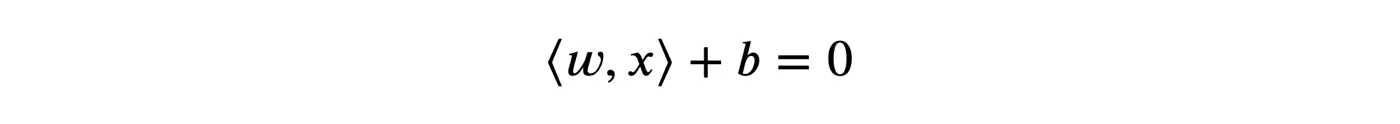

<w, x> + b = 0
General equation of a decision boundary in a vector form
Note: as we are operating in a 2-dimensional space the decision boundary will be represented by a 2D straight line, so w and x both consist of 2 elements.

And here’s the trick. We transform the dot product of vectors w and x, and then solve the equation for the second element of x:

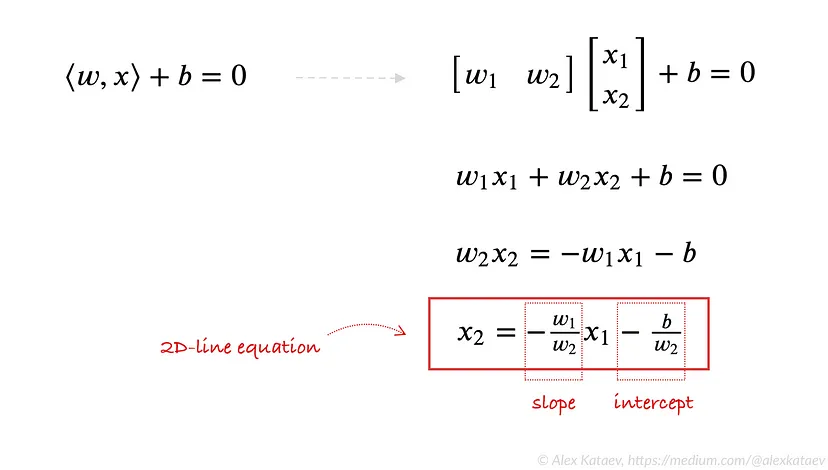

We’ve translated general equation of a decision boundary in vector form to a simple 2D-line equation.
From general equation to a 2D-line equation
As a result, we got a classic linear equation in slope-intercept form which, in our case, describes a 2D straight line. Okay, we got it, but you still probably have some questions like:

Where w_1 and w_2 exactly stored in our sklearn model object?
and what are the x_1 and x_2?
Look at the picture:

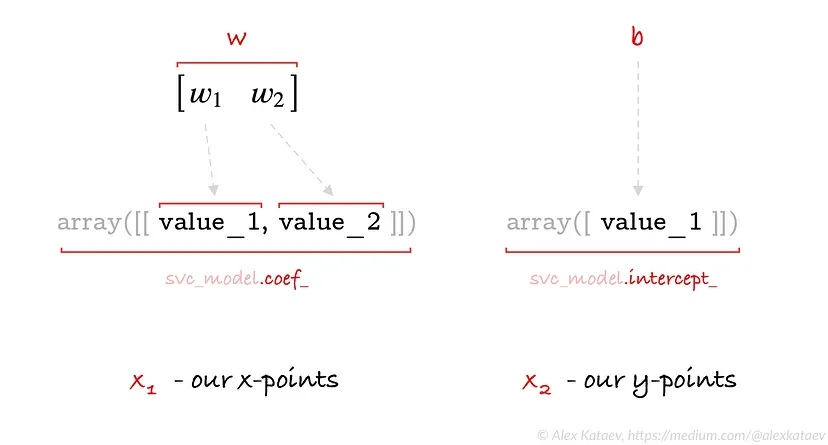

Here I showed what is w, b, x_1, and x_2.
Revealing the parts of a 2D-line equation
w is contained in attribute coef_ of our model (svc_model.coef_) and these are coordinates of a normal vector to our decision boundary (that vector is orthogonal to the hyperplane).

b is an attribute intercept_ of our model (svc_model.intercept_).

x_1 is an array of x-points of a coordinate plane.

x_2 is a resulting array of y-points of a coordinate plane.

As you noticed, we have only 2 elements for w and the same for x. That’s because we’re exploring SVM classification in 2-dimensional space just to make the idea of plotting SVM decision boundary and margins more clear.

2. Bring it all together
Just make some substitutions to the 2D-line formula…

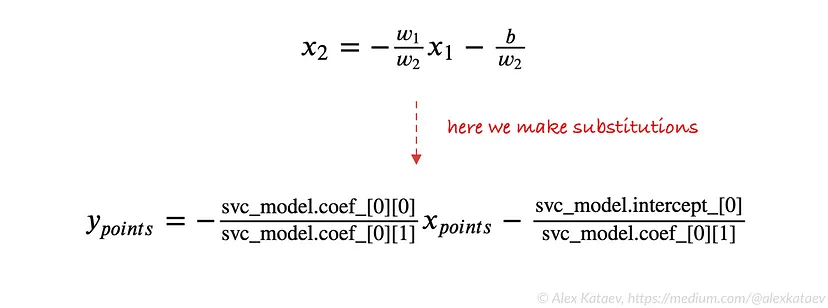

… and in code we get:

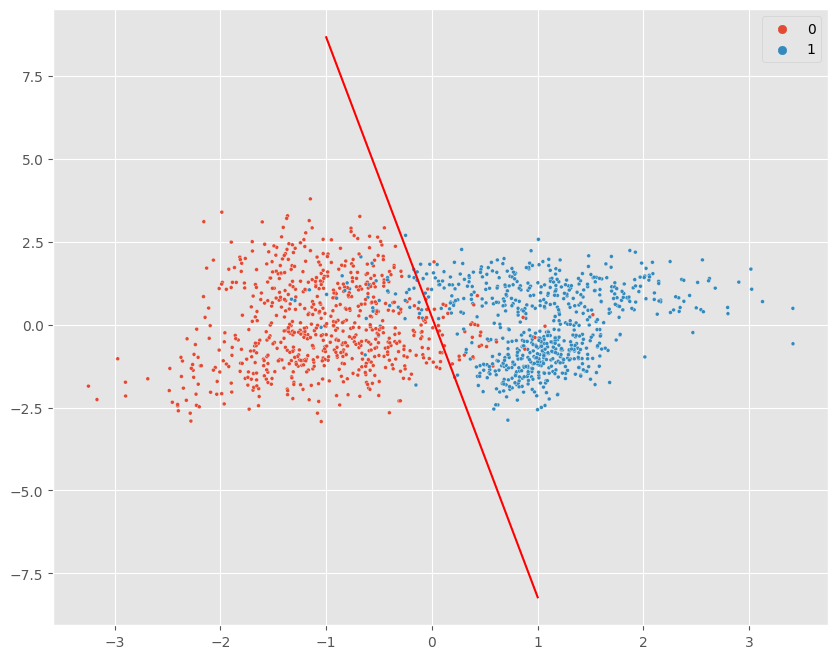

In [22]:
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X_train[:, 0], 
                y=X_train[:, 1], 
                hue=y_train, 
                s=8)
# Constructing a hyperplane using a formula.
w = svc_model.coef_[0]           # w consists of 2 elements
b = svc_model.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r')

Great! We’ve now plotted the decision boundary! So it is time to move on to SVM margins.

4. Plotting SVM margins
Here I created a picture of decision boundary and margins. The grey dashed lines are the “boundaries of margins” which demonstrate what they are based on, and how to calculate their magnitude. Look carefully at all aspects:

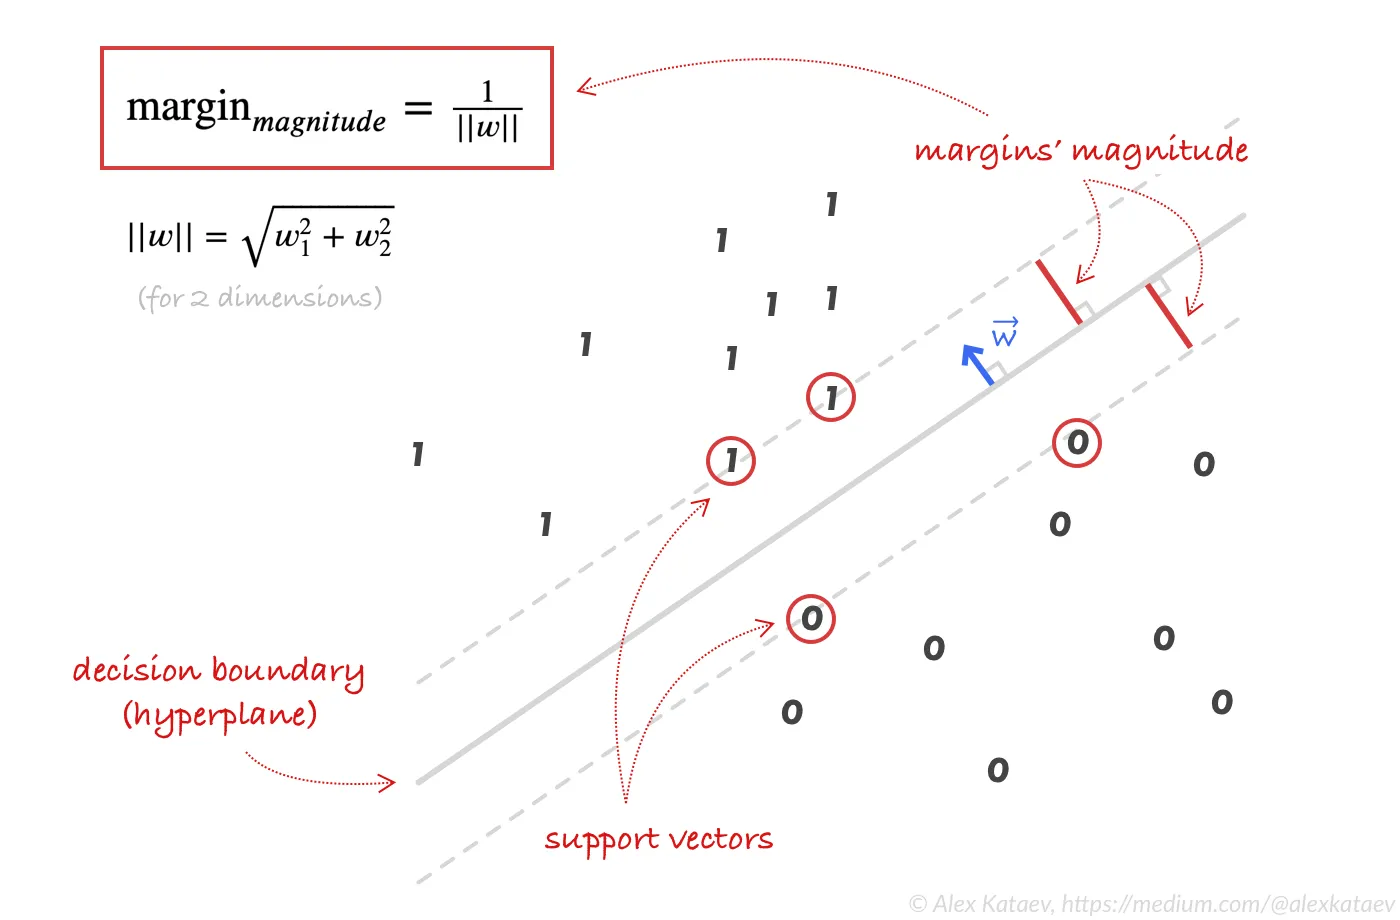

SVM classification illustrated. Decision boundary, margins, and support vectors.
So, the dashed lines are just the decision boundary line translated along direction of vector w by the distance equals margin. And we can do that using this algorithm:

Step 1. Find a normal vector to the decision boundary;
Step 2. Calculate a unit vector of that normal vector -- let's call it `w_hat`;
Step 3. Get a distance between the lines (margin);
Step 4. Translate all points of the decision boundary to a new location by this formula:
# for a line above
new_points_above = hyperplane_points + w_hat * margin
# for a line below
new_points_below = hyperplane_points - w_hat * margin
Step 1: We already know, that w is a normal vector we need — it’s always orthogonal to a hyperplane (btw, here’s why — stackoverflow link). And we also know that it is contained in attribute coef_ of our model (svc_model.coef_).

Step 2: Let’s calculate the unit vector:

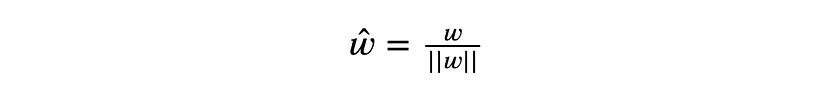

Unit-vector formula. Unit vector equals vector itself divided by vector’s magnitude
Unit-vector formula
# Calculating the unit vector of w
w_hat = svc_model.coef_[0] / (np.sqrt(np.sum(svc_model.coef_[0] ** 2)))
Step 3: Now we calculate margin:

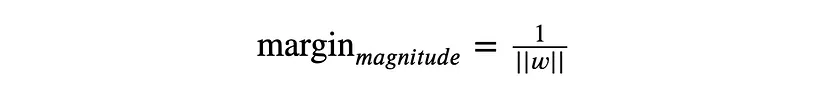

Margin equals 1 divided by vector’s w magnitude (or second norm)
Margin formula
# Calculating margin
margin = 1 / np.sqrt(np.sum(svc_model.coef_[0] ** 2))
Step 4: Finally, we calculate points of new lines:

# Calculating margin lines
new_points_up   = hyperplane_points + w_hat * margin
new_points_down = hyperplane_points - w_hat * margin
And one more thing… Yeah, let’s put it all together and plot the result:

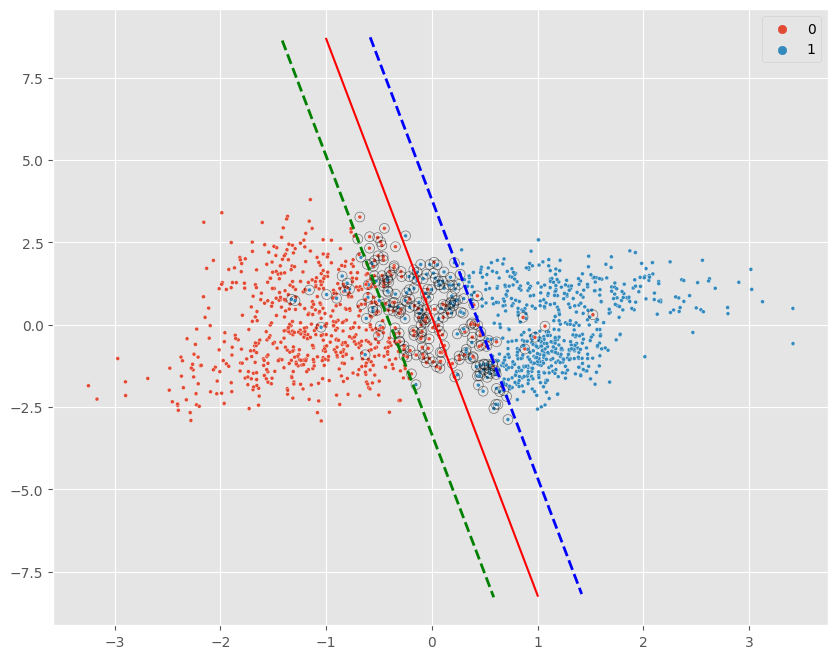

In [23]:
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X_train[:, 0], 
                y=X_train[:, 1], 
                hue=y_train, 
                s=8);
# Constructing a hyperplane using a formula.
w = svc_model.coef_[0]           # w consists of 2 elements
b = svc_model.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');
# Encircle support vectors
plt.scatter(svc_model.support_vectors_[:, 0],
            svc_model.support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='k', 
            alpha=.5);
# Step 2 (unit-vector):
w_hat = svc_model.coef_[0] / (np.sqrt(np.sum(svc_model.coef_[0] ** 2)))
# Step 3 (margin):
margin = 1 / np.sqrt(np.sum(svc_model.coef_[0] ** 2))
# Step 4 (calculate points of the margin lines):
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin
# Plot margin lines
# Blue margin line above
plt.plot(points_of_line_above[:, 0], 
         points_of_line_above[:, 1], 
         'b--', 
         linewidth=2)
# Green margin line below
plt.plot(points_of_line_below[:, 0], 
         points_of_line_below[:, 1], 
         'g--',
         linewidth=2)


This is the link to the [towards_data_scienc_article](https://medium.com/geekculture/svm-classification-with-sklearn-svm-svc-how-to-plot-a-decision-boundary-with-margins-in-2d-space-7232cb3962c0)